In [22]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [6]:
DF=pd.read_csv("drug200.csv")
DF['Sex'].replace(['F', 'M'],
                        [0, 1], inplace=True)
DF['BP'].replace(['HIGH', 'LOW','NORMAL'],
                        [0, 1, 2], inplace=True)
DF['Cholesterol'].replace(['HIGH', 'LOW','NORMAL'],
                        [0, 1, 2], inplace=True)
DF.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [11]:
X=DF[['Age','Sex','BP','Cholesterol','Na_to_K']]
Y=DF['Drug']

In [13]:
X_trainset,X_testset,Y_trainset,Y_testset = train_test_split(X,Y,test_size=0.2,random_state=10)

In [17]:
X_testset.shape

(40, 5)

In [27]:
Tree=DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [28]:
predTree=Tree.predict(X_testset)
print (predTree [0:5])
print (Y_testset [0:5])
metrics.accuracy_score(Y_testset, predTree)

['drugY' 'drugX' 'drugY' 'drugX' 'drugY']
59     drugY
5      drugX
20     drugY
198    drugX
52     drugY
Name: Drug, dtype: object


1.0

[Text(0.625, 0.9, 'x[4] <= 14.829\nentropy = 1.915\nsamples = 160\nvalue = [17, 13, 10, 45, 75]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.728\nsamples = 85\nvalue = [17, 13, 10, 45, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\nentropy = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.684\nsamples = 55\nvalue = [0, 0, 10, 45, 0]'),
 Text(0.625, 0.3, 'x[3] <= 1.0\nentropy = 0.961\nsamples = 26\nvalue = [0, 0, 10, 16, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 0, 29, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 75\nvalue = [0, 0, 0, 0, 75]')]

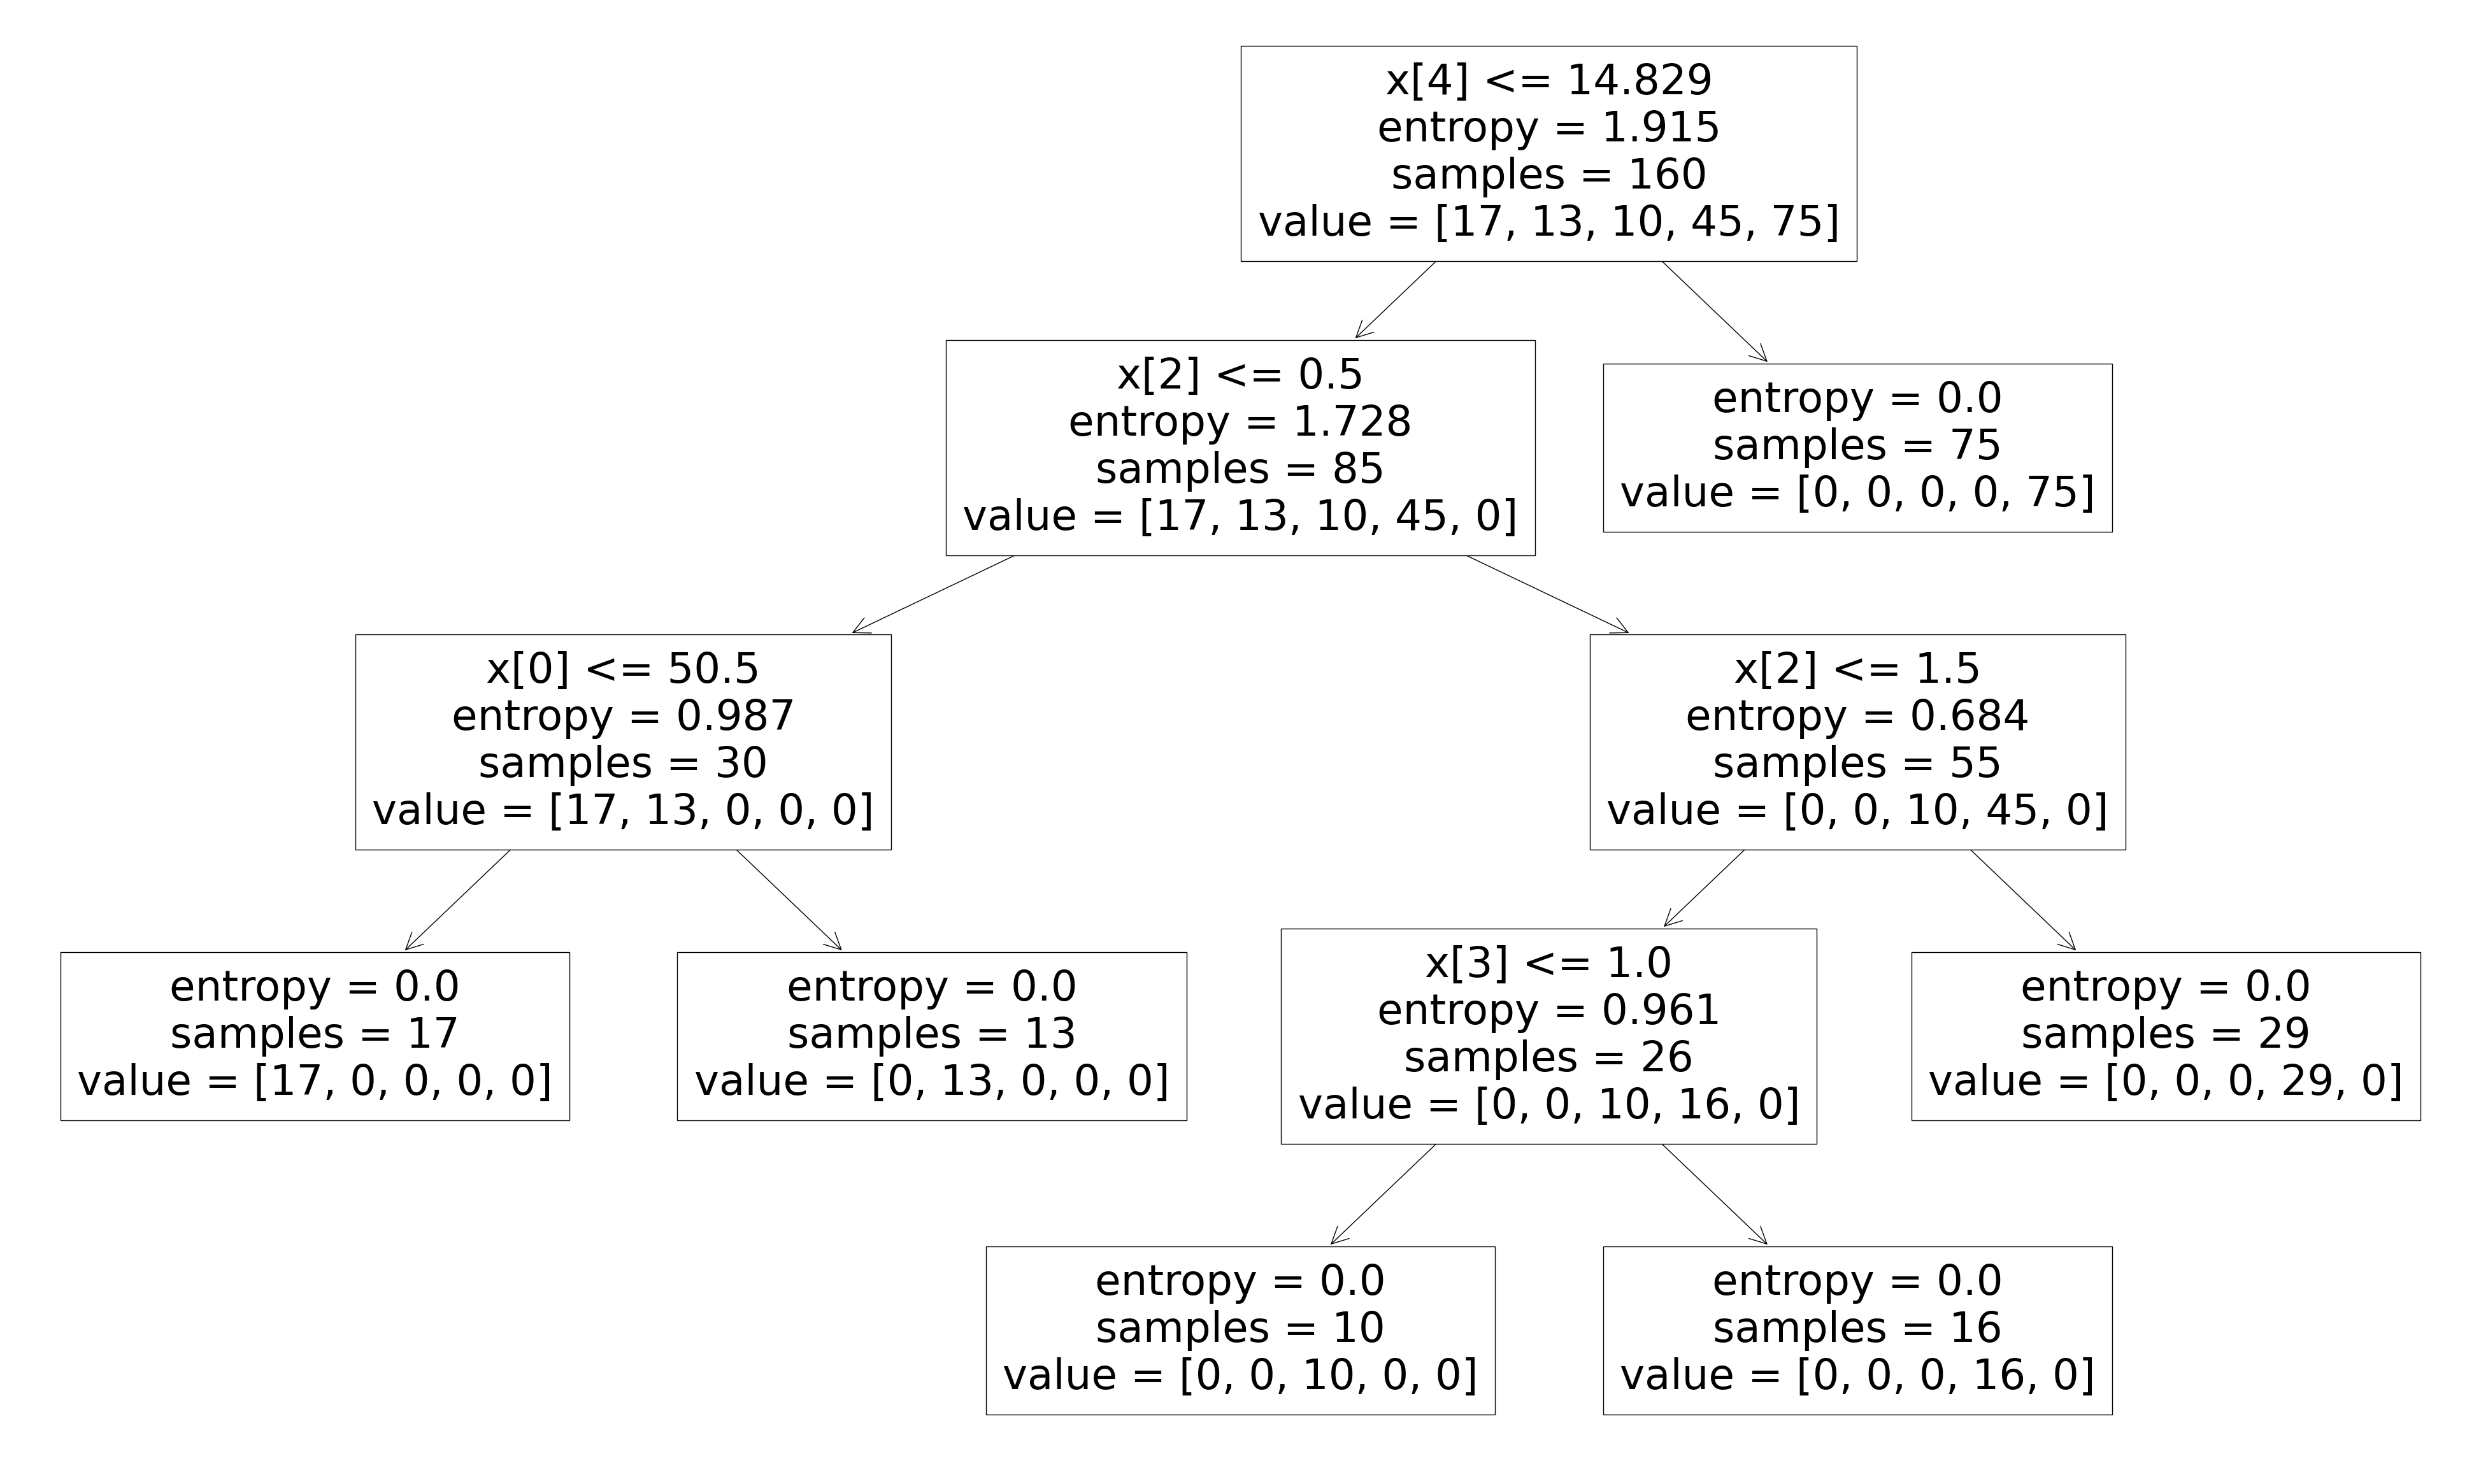

In [29]:
import matplotlib.pyplot as plt
from sklearn import tree
fig=plt.figure(figsize=(50,30))
tree.plot_tree(Tree)